In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import scipy.stats as stats
from sklearn.datasets import load_iris 
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [3]:
train = pd.read_csv('/Users/annamitchell/Desktop/GA_Docs/Projects/Ames_Project_3/datasets/train_presentation.csv')

In [5]:
test = pd.read_csv('/Users/annamitchell/Desktop/GA_Docs/Projects/Ames_Project_3/datasets/test_presentation.csv')

In [40]:
original = pd.read_csv('/Users/annamitchell/Desktop/GA_Docs/Projects/Ames_Project_3/datasets/train.csv')

In [47]:
original.columns=original.columns.str.lower().str.replace(' ', '_')

In [48]:
print(sorted(original.columns))

['1st_flr_sf', '2nd_flr_sf', '3ssn_porch', 'alley', 'bedroom_abvgr', 'bldg_type', 'bsmt_cond', 'bsmt_exposure', 'bsmt_full_bath', 'bsmt_half_bath', 'bsmt_qual', 'bsmt_unf_sf', 'bsmtfin_sf_1', 'bsmtfin_sf_2', 'bsmtfin_type_1', 'bsmtfin_type_2', 'central_air', 'condition_1', 'condition_2', 'electrical', 'enclosed_porch', 'exter_cond', 'exter_qual', 'exterior_1st', 'exterior_2nd', 'fence', 'fireplace_qu', 'fireplaces', 'foundation', 'full_bath', 'functional', 'garage_area', 'garage_cars', 'garage_cond', 'garage_finish', 'garage_qual', 'garage_type', 'garage_yr_blt', 'gr_liv_area', 'half_bath', 'heating', 'heating_qc', 'house_style', 'id', 'kitchen_abvgr', 'kitchen_qual', 'land_contour', 'land_slope', 'lot_area', 'lot_config', 'lot_frontage', 'lot_shape', 'low_qual_fin_sf', 'mas_vnr_area', 'mas_vnr_type', 'misc_feature', 'misc_val', 'mo_sold', 'ms_subclass', 'ms_zoning', 'neighborhood', 'open_porch_sf', 'overall_cond', 'overall_qual', 'paved_drive', 'pid', 'pool_area', 'pool_qc', 'roof_mat

In [41]:
train.columns

Index(['overall_qual', 'year_built', 'roof_style', 'roof_matl', 'mas_vnr_area',
       'exter_cond', 'bsmt_exposure', 'total_bsmt_sf', 'gr_liv_area',
       'full_bath', 'kitchen_qual', 'garage_area', 'paved_drive', 'saleprice',
       'attached_garage', 'has_basement', 'offsite_feature', 'residential_low',
       'residential_other', 'floating_village', 'hillside', 'banked',
       'culdesac', 'northridge', 'northridge_hts', 'briardale',
       'log_gr_liv_area', 'log_total_bsmt_sf', 'sqrt_gr_liv_area'],
      dtype='object')

In [7]:
train.drop('Unnamed: 0', axis=1, inplace=True)

In [8]:
train.columns

Index(['overall_qual', 'year_built', 'roof_style', 'roof_matl', 'mas_vnr_area',
       'exter_cond', 'bsmt_exposure', 'total_bsmt_sf', 'gr_liv_area',
       'full_bath', 'kitchen_qual', 'garage_area', 'paved_drive', 'saleprice',
       'attached_garage', 'has_basement', 'offsite_feature', 'residential_low',
       'residential_other', 'floating_village', 'hillside', 'banked',
       'culdesac', 'northridge', 'northridge_hts', 'briardale',
       'log_gr_liv_area', 'log_total_bsmt_sf', 'sqrt_gr_liv_area'],
      dtype='object')

In [9]:
train.dtypes

overall_qual           int64
year_built             int64
roof_style             int64
roof_matl              int64
mas_vnr_area         float64
exter_cond             int64
bsmt_exposure        float64
total_bsmt_sf        float64
gr_liv_area            int64
full_bath              int64
kitchen_qual           int64
garage_area          float64
paved_drive            int64
saleprice              int64
attached_garage      float64
has_basement           int64
offsite_feature        int64
residential_low        int64
residential_other      int64
floating_village       int64
hillside               int64
banked                 int64
culdesac               int64
northridge             int64
northridge_hts         int64
briardale              int64
log_gr_liv_area      float64
log_total_bsmt_sf    float64
sqrt_gr_liv_area     float64
dtype: object

### Price Distrubution Graph

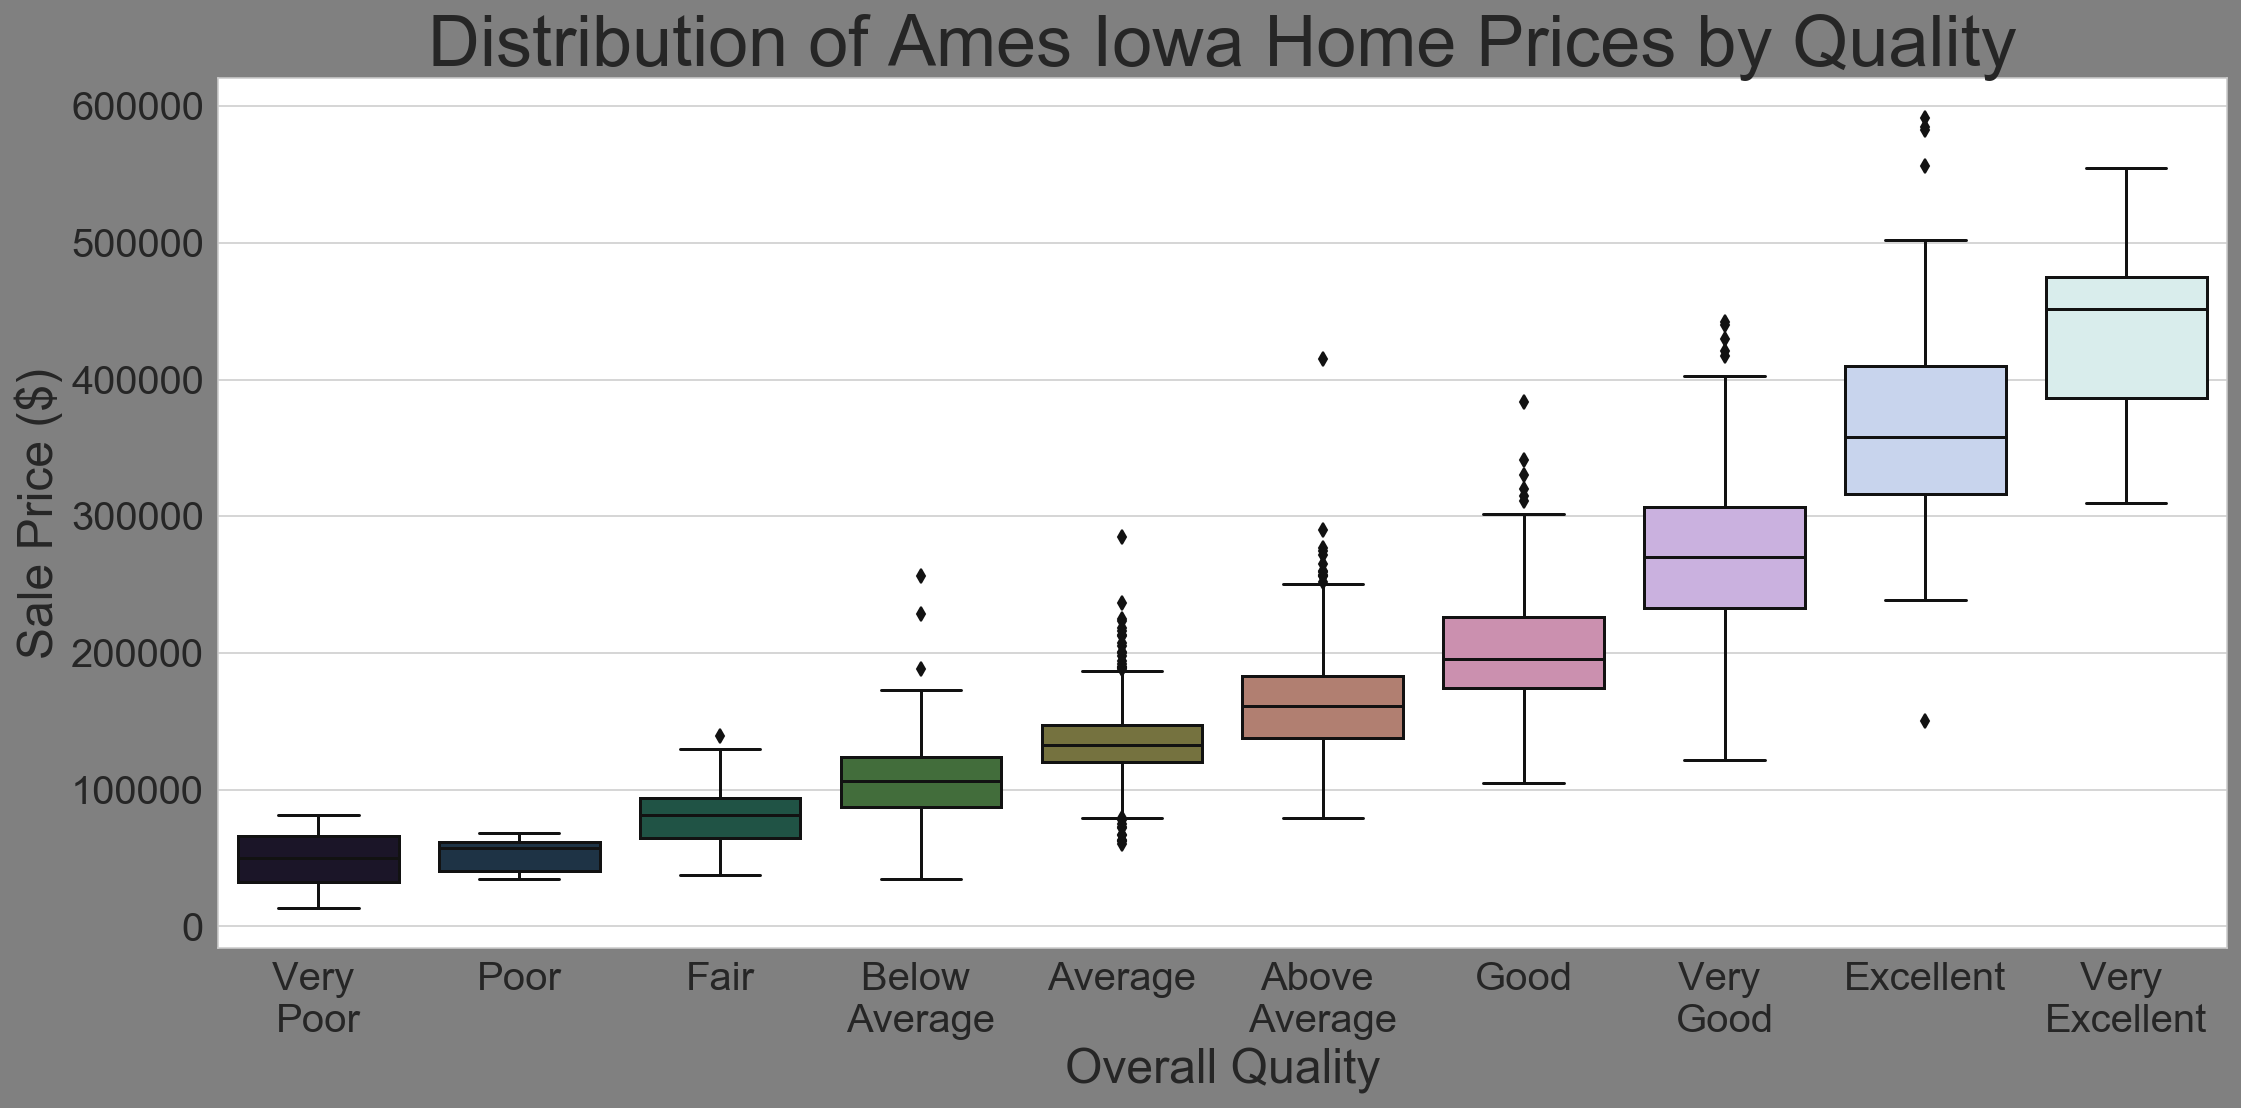

In [10]:
plt.figure(figsize=(18, 8), facecolor='gray')
plt.tick_params('both', labelsize=20)
plt.title('Distribution of Ames Iowa Home Prices by Quality', fontsize=36)
sns.boxplot(x=train.overall_qual, y=train.saleprice, palette='cubehelix')
plt.xticks(np.arange(10), ['Very \nPoor', 'Poor', 'Fair', 'Below \nAverage', 'Average', 
                           'Above \nAverage','Good', 'Very \nGood', 'Excellent', 'Very \nExcellent'])
plt.ylabel('Sale Price ($)', fontsize=24)
plt.xlabel('Overall Quality', fontsize=24);

In [17]:
train.columns

Index(['overall_qual', 'year_built', 'roof_style', 'roof_matl', 'mas_vnr_area',
       'exter_cond', 'bsmt_exposure', 'total_bsmt_sf', 'gr_liv_area',
       'full_bath', 'kitchen_qual', 'garage_area', 'paved_drive', 'saleprice',
       'attached_garage', 'has_basement', 'offsite_feature', 'residential_low',
       'residential_other', 'floating_village', 'hillside', 'banked',
       'culdesac', 'northridge', 'northridge_hts', 'briardale',
       'log_gr_liv_area', 'log_total_bsmt_sf', 'sqrt_gr_liv_area'],
      dtype='object')

### Model Predicition Graph

In [20]:
X19 = train.drop('saleprice', axis=1).drop(
    ['sqrt_gr_liv_area', 'log_total_bsmt_sf', 
     'mas_vnr_area', 'roof_style', 'has_basement',
     'floating_village',
     'full_bath', 'total_bsmt_sf',
     'offsite_feature', 'northridge', 'culdesac', 
     'banked', 'roof_matl', 'briardale'], axis=1)
y19 = np.log(train['saleprice'])

X19_train, X19_test, y19_train, y19_test = train_test_split(X19, y19, random_state = 12, test_size=0.05)

ss = StandardScaler()
ss.fit(X19_train)
X19_train_sc = ss.transform(X19_train)
X19_test_sc = ss.transform(X19_test)

l_alphas = np.logspace(-5, 0, 1000)
lasso_model19 = LassoCV(alphas=l_alphas, cv=5)
lasso_model19 = lasso_model19.fit(X19_train_sc, y19_train)

print (lasso_model19.alpha_)

y_pred19 = lasso_model19.predict(X19_train_sc)
y_pred_test19 = lasso_model19.predict(X19_test_sc)

print(f'Train R2 = {r2_score(np.exp(y19_train), np.exp(y_pred19))}')
print(f'Test R2 = {r2_score(np.exp(y19_test), np.exp(y_pred_test19))}')
print(f'Cross Val Score = {cross_val_score(lasso_model19, X19_train_sc, y19_train, cv=5).mean()}')

resids19 = y19_train - y_pred19

1e-05
Train R2 = 0.8874420660922455
Test R2 = 0.75112959324053
Cross Val Score = 0.866709422403986


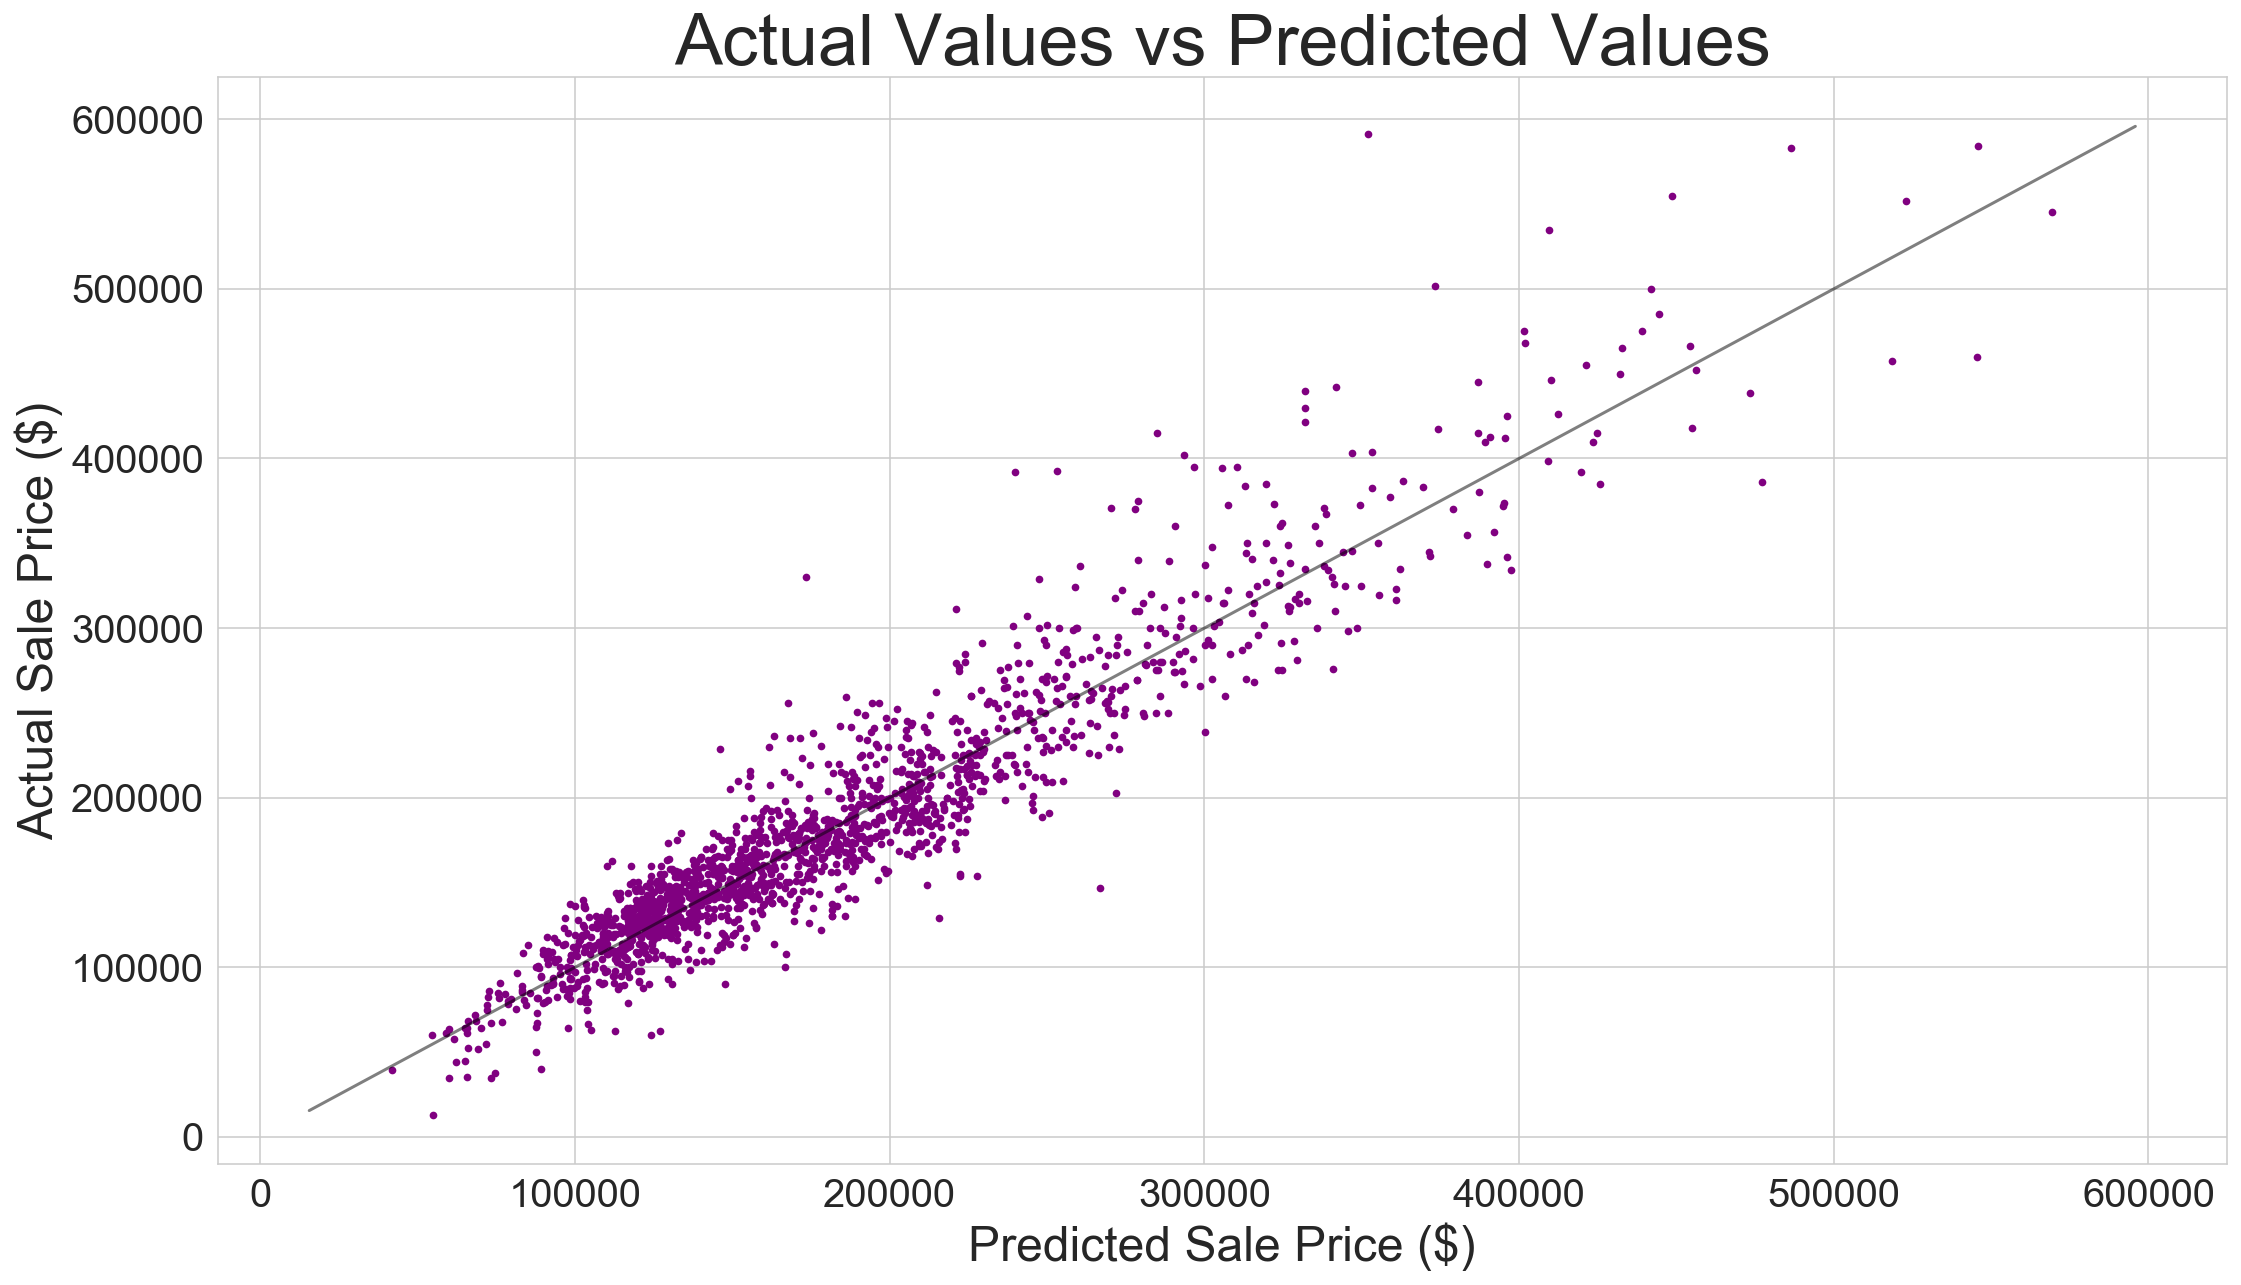

In [105]:
plt.figure(figsize=(18, 10)) #facecolor='gray')

plt.scatter(np.exp(y_pred19), np.exp(y19_train), color='purple', s = 8)
plt.title('Actual Values vs Predicted Values', fontsize=36)

plt.tick_params('both', labelsize=20)
plt.xlabel('Predicted Sale Price ($)', fontsize=24)
plt.ylabel('Actual Sale Price ($)', fontsize=24)
x = np.linspace(*plt.xlim())
plt.plot(x, x, color='black', alpha=0.5);

### Quality Graphs

In [26]:
# Creating hypothetical datasets for each quality to show how predicted values change
#code help from stackoverflow, statsbyjim, and stats.stackexchange.com 
saleprices = pd.DataFrame()
for n in range (1, 11):
    
    str_n=str(n)
    index = 'saleprice'+str_n
    X19['overall_qual']= n
    X19_nsc = ss.transform(X19)
    saleprices[index] = np.exp(lasso_model19.predict(X19_nsc))

''

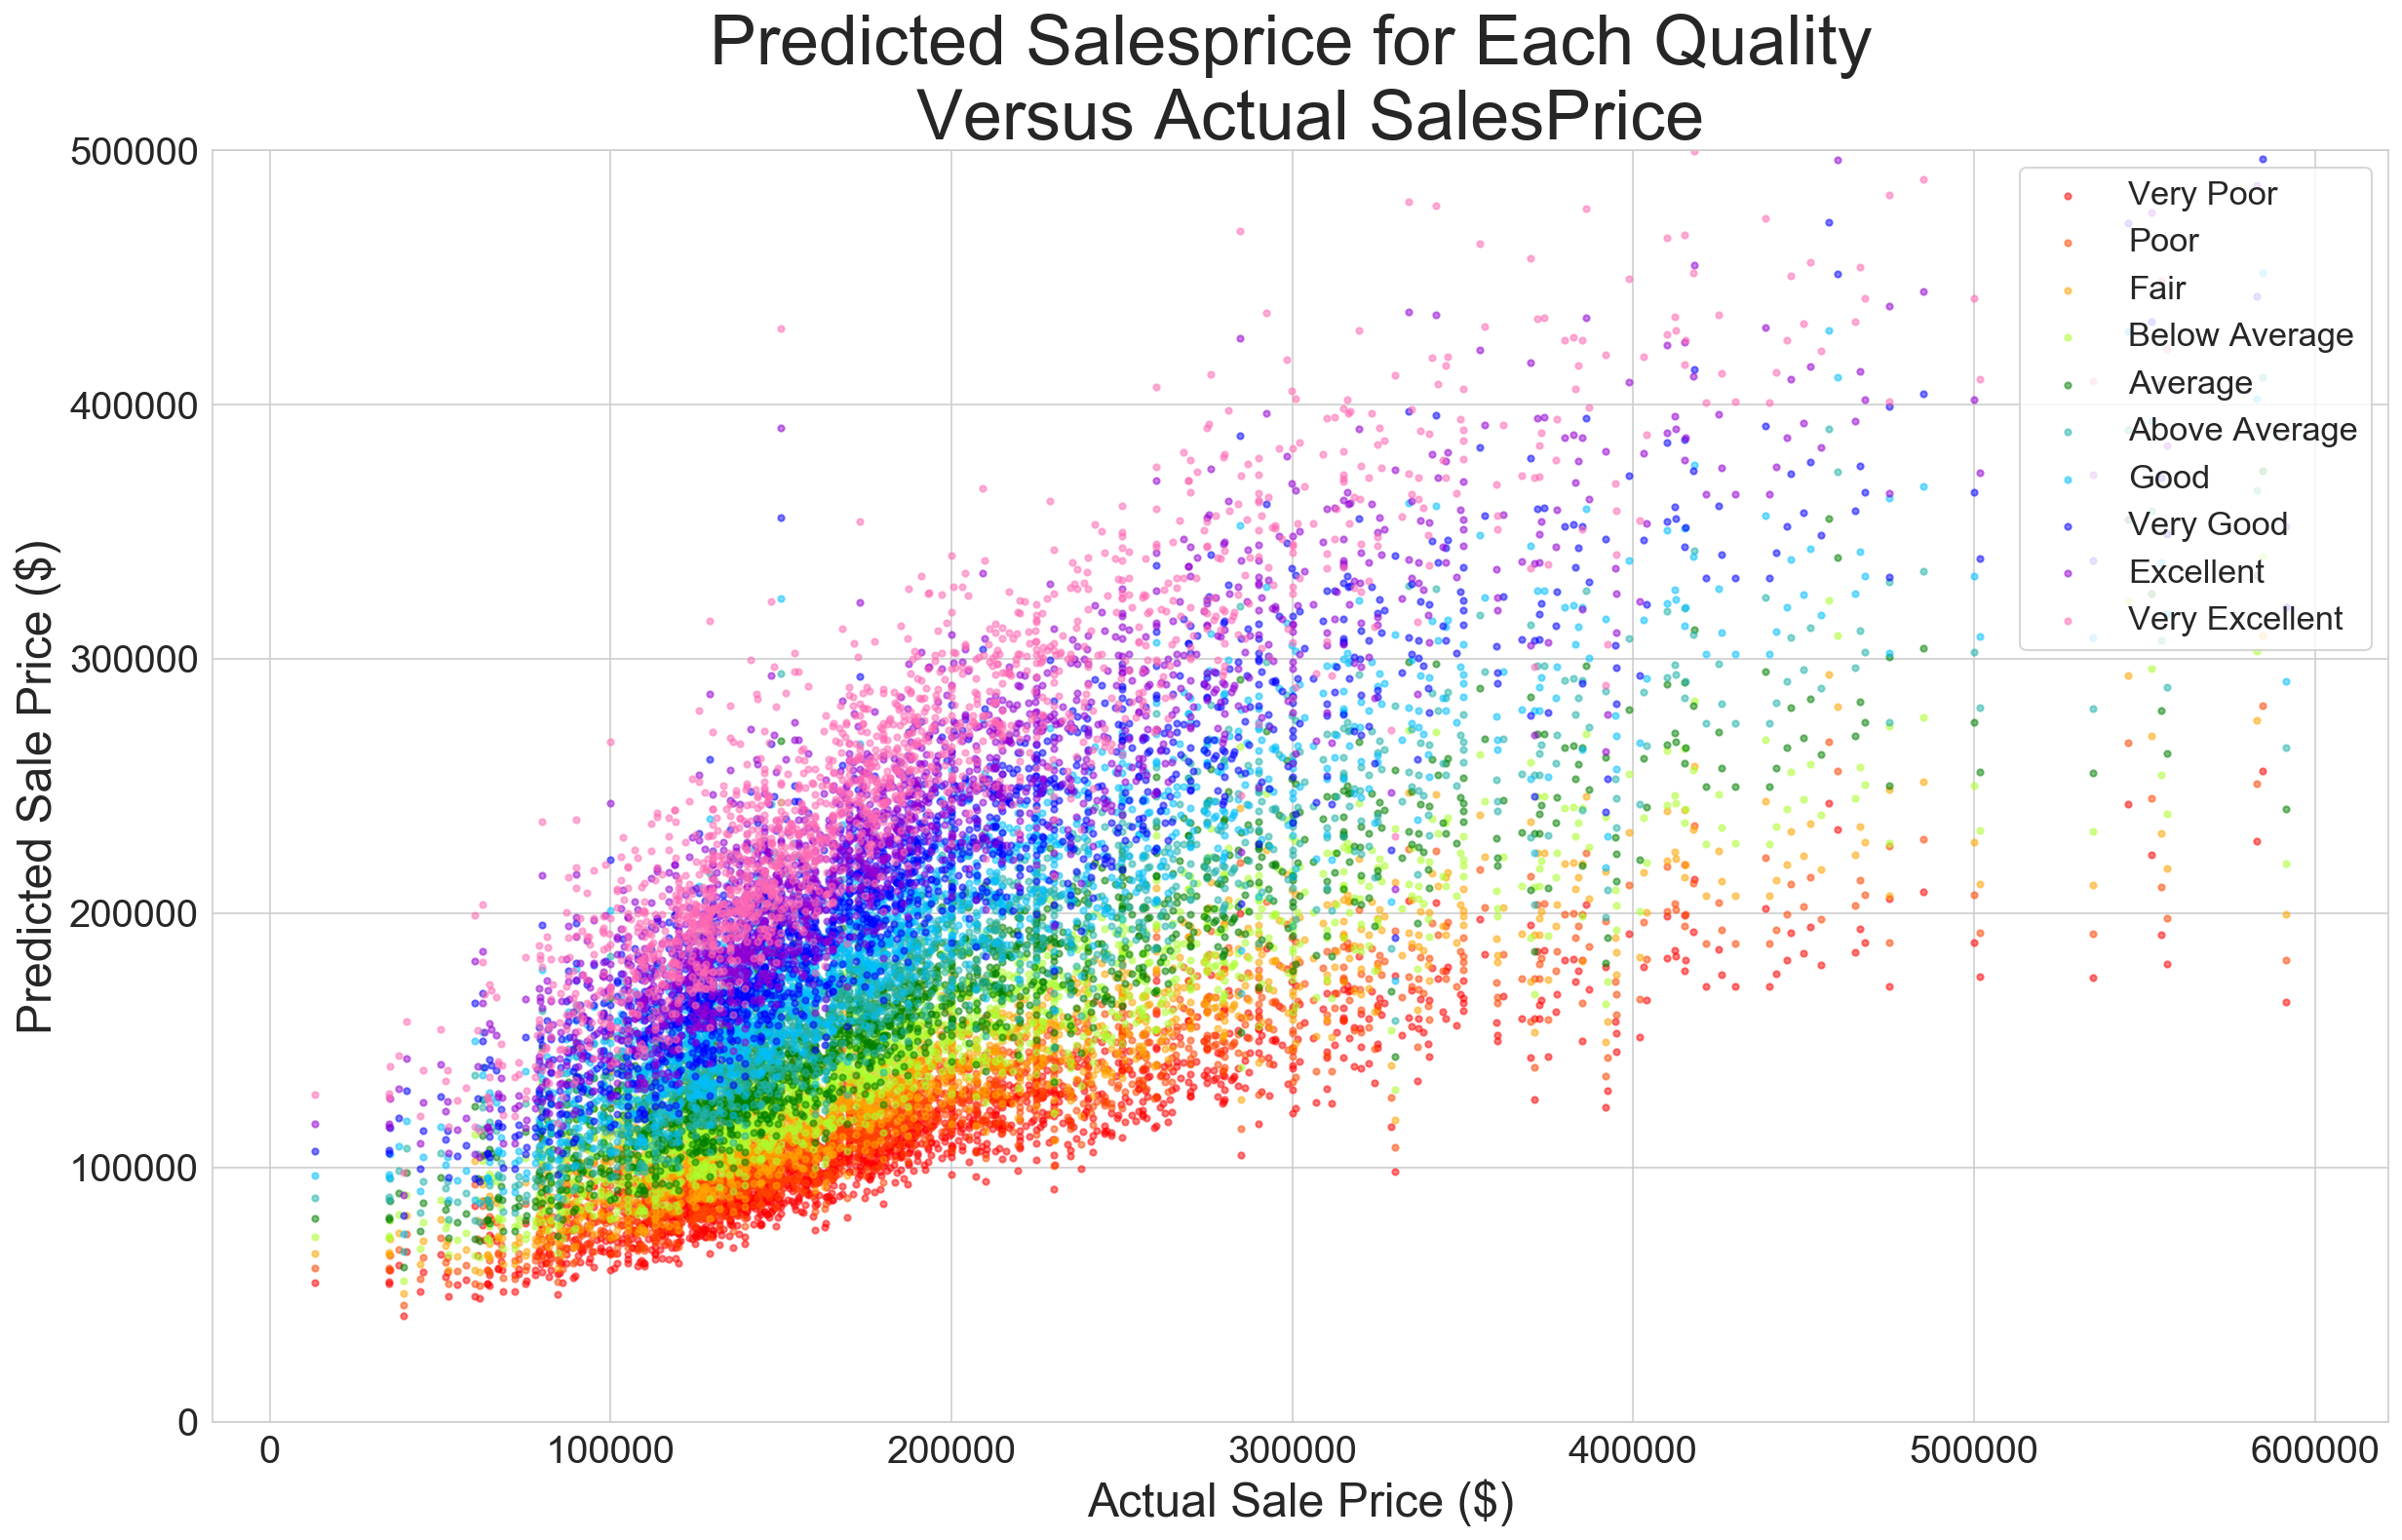

In [106]:
#code help from stackoverflow, statsbyjim, and stats.stackexchange.com 

colors = ['na', 'red', 'orangered', 'orange', 'greenyellow', 'green', 
         'lightseagreen', 'deepskyblue', 'blue', 'darkviolet', 'hotpink']

plt.figure(figsize=(20, 12)) #(facecolor='gray')
plt.title('Predicted Salesprice for Each Quality \n Versus Actual SalesPrice', fontsize=36)
plt.tick_params('both', labelsize=20)
plt.xlabel('Actual Sale Price ($)', fontsize=24)
plt.ylabel('Predicted Sale Price ($)', fontsize=24)
plt.ylim(0,500000)

for n in range(1, 11):
    str_n=str(n)
    index = 'saleprice'+str_n
    plt.scatter(train.saleprice, saleprices[index], c=colors[n], s = 10, alpha = 0.5)
plt.legend(['Very Poor', 'Poor', 'Fair', 'Below Average', 'Average', 
            'Above Average','Good', 'Very Good', 'Excellent', 'Very Excellent'],
           loc=1, fontsize='xx-large'
          
          )
;

In [55]:
#original.info()

In [56]:
original['was_recently_remodeled'] = train['was_recently_remodeled']
original['attached_garage'] = train['attached_garage']
original['kitchen_qual'] = train['kitchen_qual']
original['paved_drive'] = train['paved_drive']
original['bsmt_exposure'] = train['bsmt_exposure']

In [57]:
#original['year_remod/add'].value_counts()

In [58]:
# adding variables for  presentation 
train['was_remodeled'] = original['year_remod/add'] == original['year_built']
train['was_remodeled'] = train['was_remodeled'].map({True:1, False:0})
train['was_recently_remodeled'] = (train['was_remodeled'] == 1) & (original['year_remod/add']>1990)
train['was_recently_remodeled'] = train['was_recently_remodeled'].map({True:1, False:0})

In [59]:
original['year_remod/add'].isnull().sum()

0

In [60]:
corr2 = original.drop('saleprice', axis=1).corr()['overall_qual'].sort_values(ascending=False)
corr2 =pd.DataFrame(corr2)
corr2

,overall_qual
overall_qual,1.000000
year_built,0.602964
garage_cars,0.587423
year_remod/add,0.584654
garage_yr_blt,0.574553
gr_liv_area,0.566701
garage_area,0.563814
total_bsmt_sf,0.548742
full_bath,0.515080
1st_flr_sf,0.477136


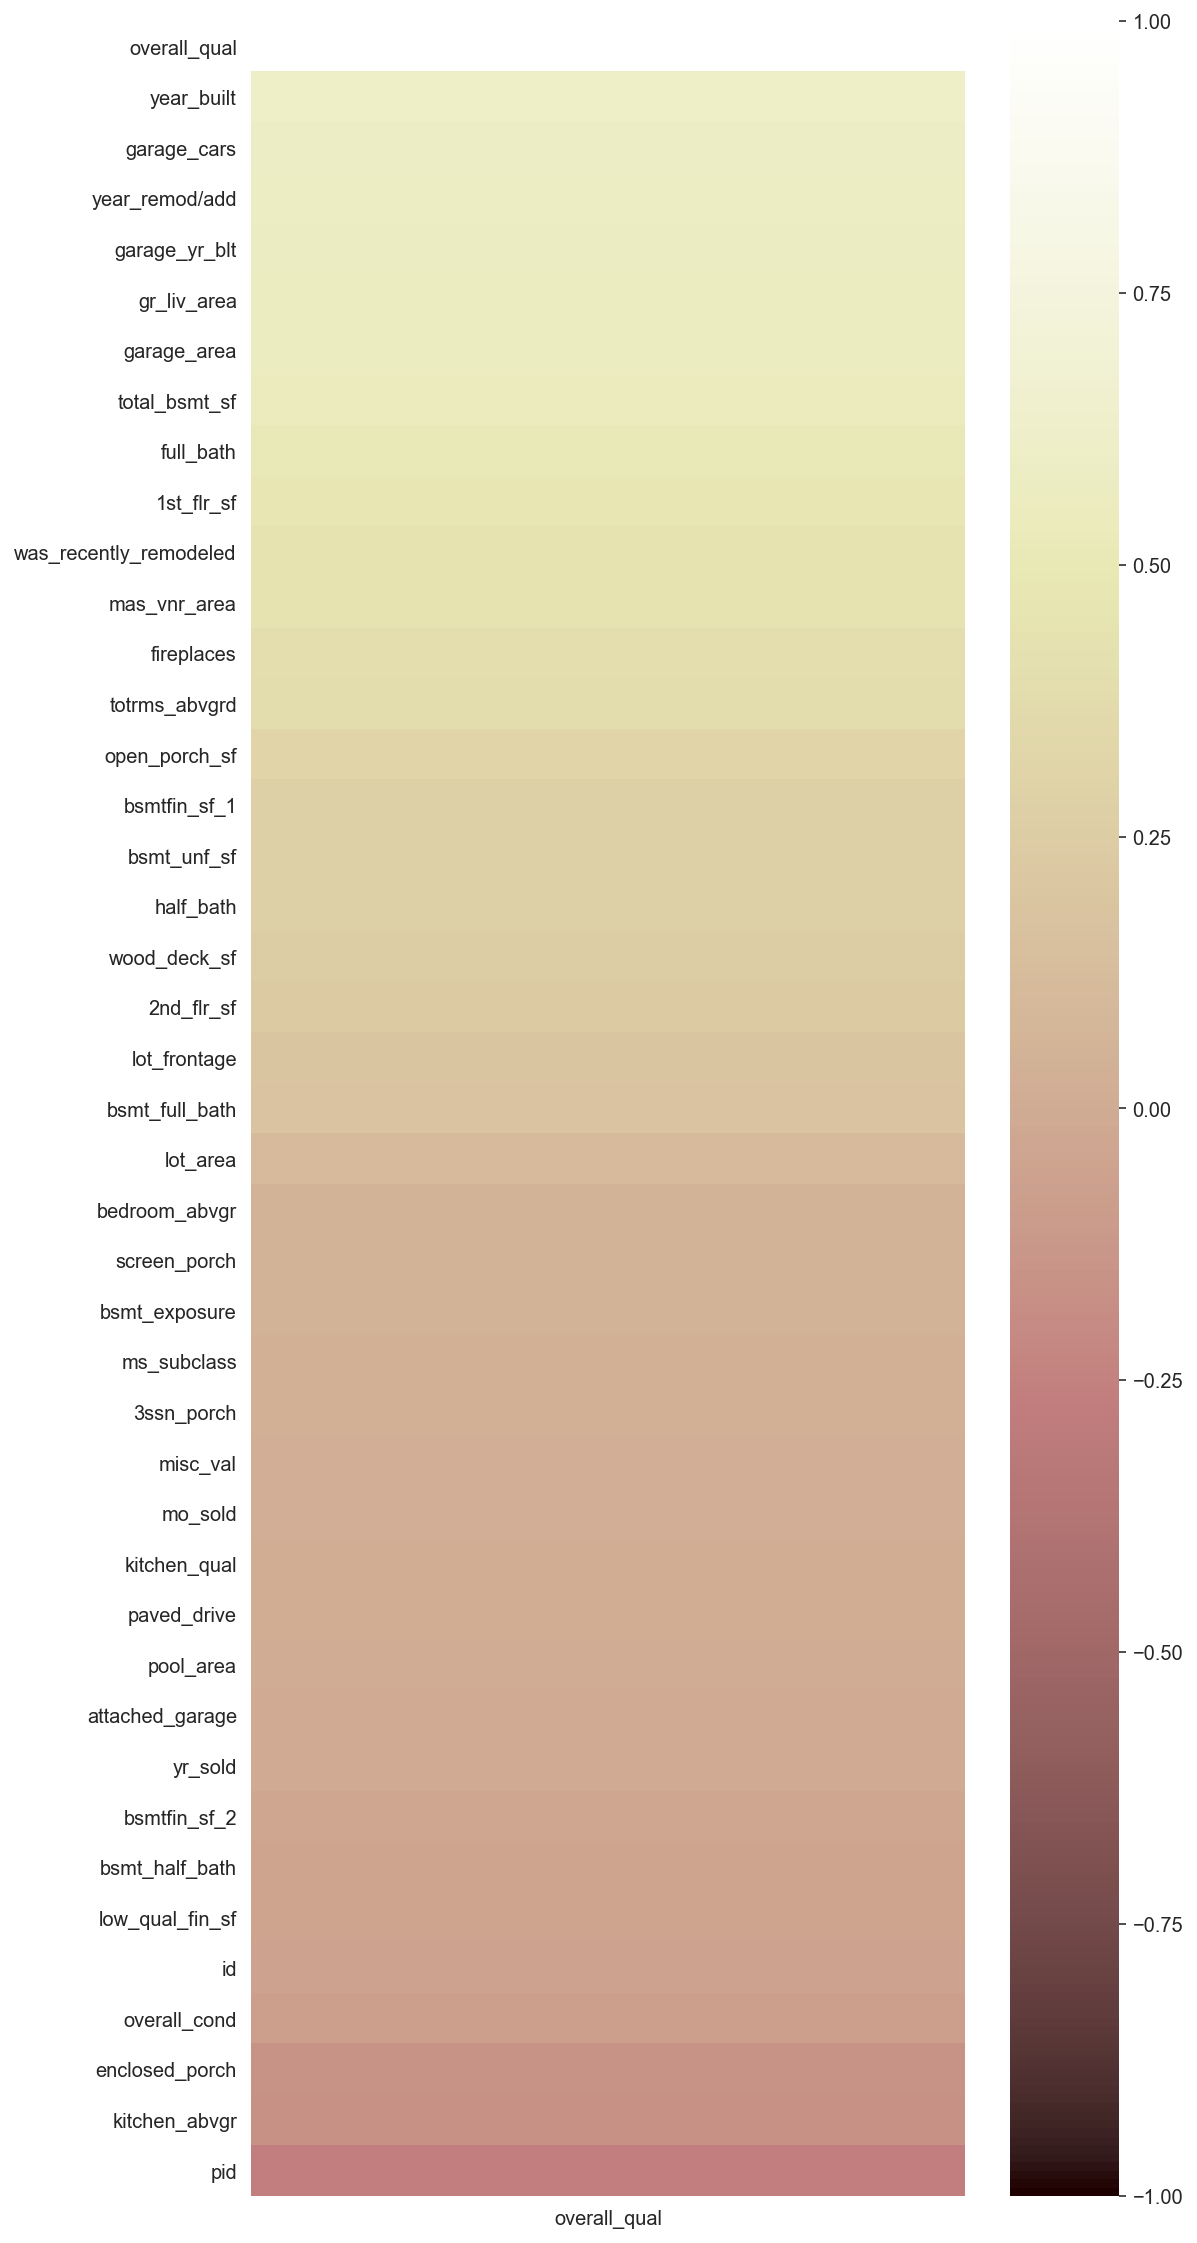

In [80]:
plt.figure(figsize=(8, 20))
sns.heatmap(corr2, cmap='pink', vmin=-1)

''

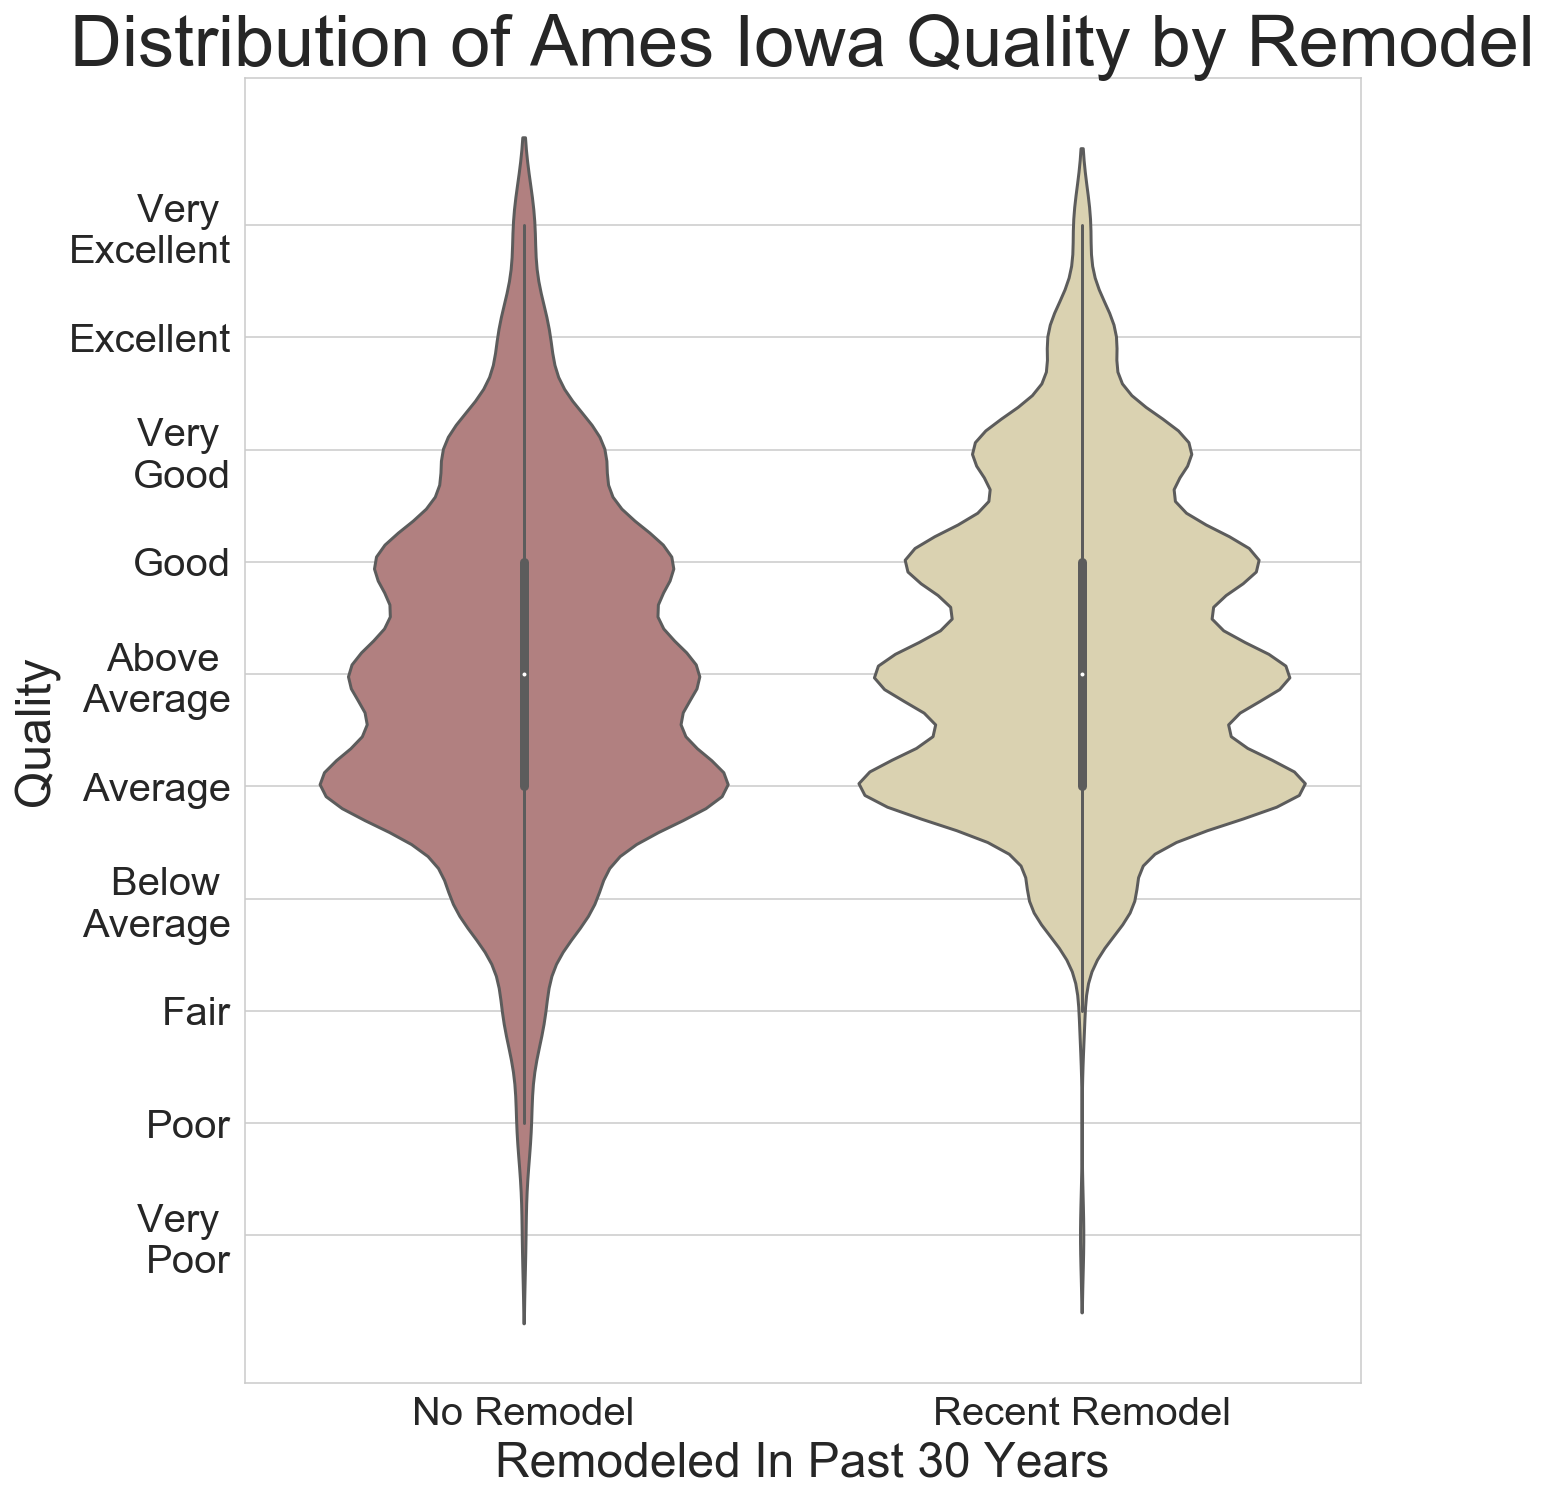

In [107]:
plt.figure(figsize=(10, 12)) #facecolor='gray')
plt.tick_params('both', labelsize=20)
plt.title('Distribution of Ames Iowa Quality by Remodel', fontsize=36)
sns.violinplot(x=train.was_remodeled, y=original.overall_qual, palette='pink')
plt.xticks(np.arange(2), ['No Remodel', 'Recent Remodel'])
plt.ylabel('Quality', fontsize=24)
plt.xlabel('Remodeled In Past 30 Years', fontsize=24)
plt.yticks(np.arange(1,11), ['Very \nPoor', 'Poor', 'Fair', 'Below \nAverage', 'Average', 
                           'Above \nAverage','Good', 'Very \nGood', 'Excellent', 'Very \nExcellent'])

;

Text(0.5, 0, 'Remodeled In Past 30 Years')

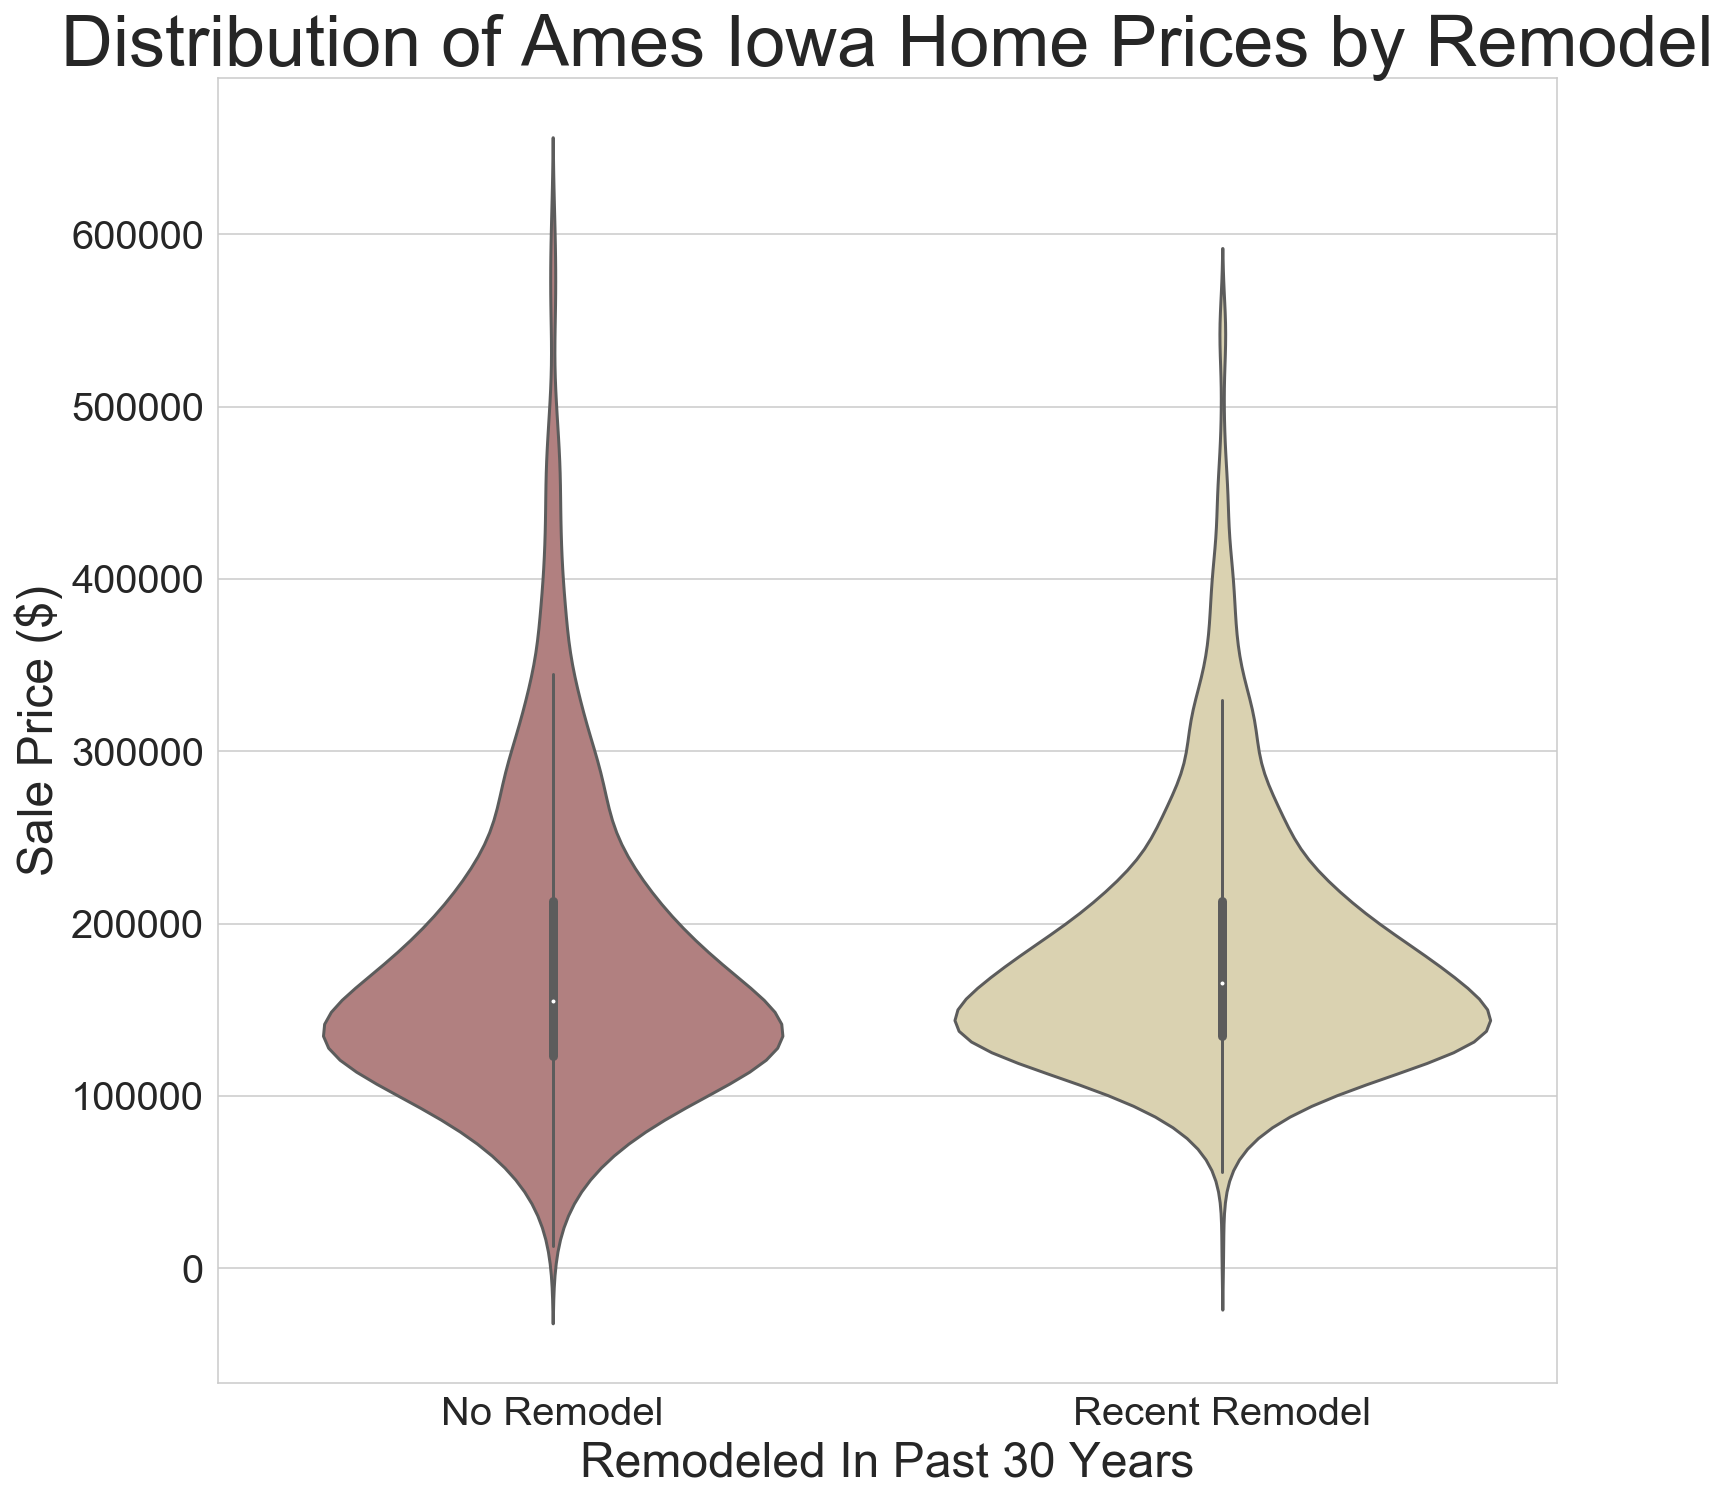

In [108]:
plt.figure(figsize=(12, 12)) #facecolor='gray')
plt.tick_params('both', labelsize=20)
plt.title('Distribution of Ames Iowa Home Prices by Remodel', fontsize=36)
sns.violinplot(x=train.was_remodeled, y=original.saleprice, palette='pink')
plt.xticks(np.arange(2), ['No Remodel', 'Recent Remodel'])
plt.ylabel('Sale Price ($)', fontsize=24)
plt.xlabel('Remodeled In Past 30 Years', fontsize=24)

''

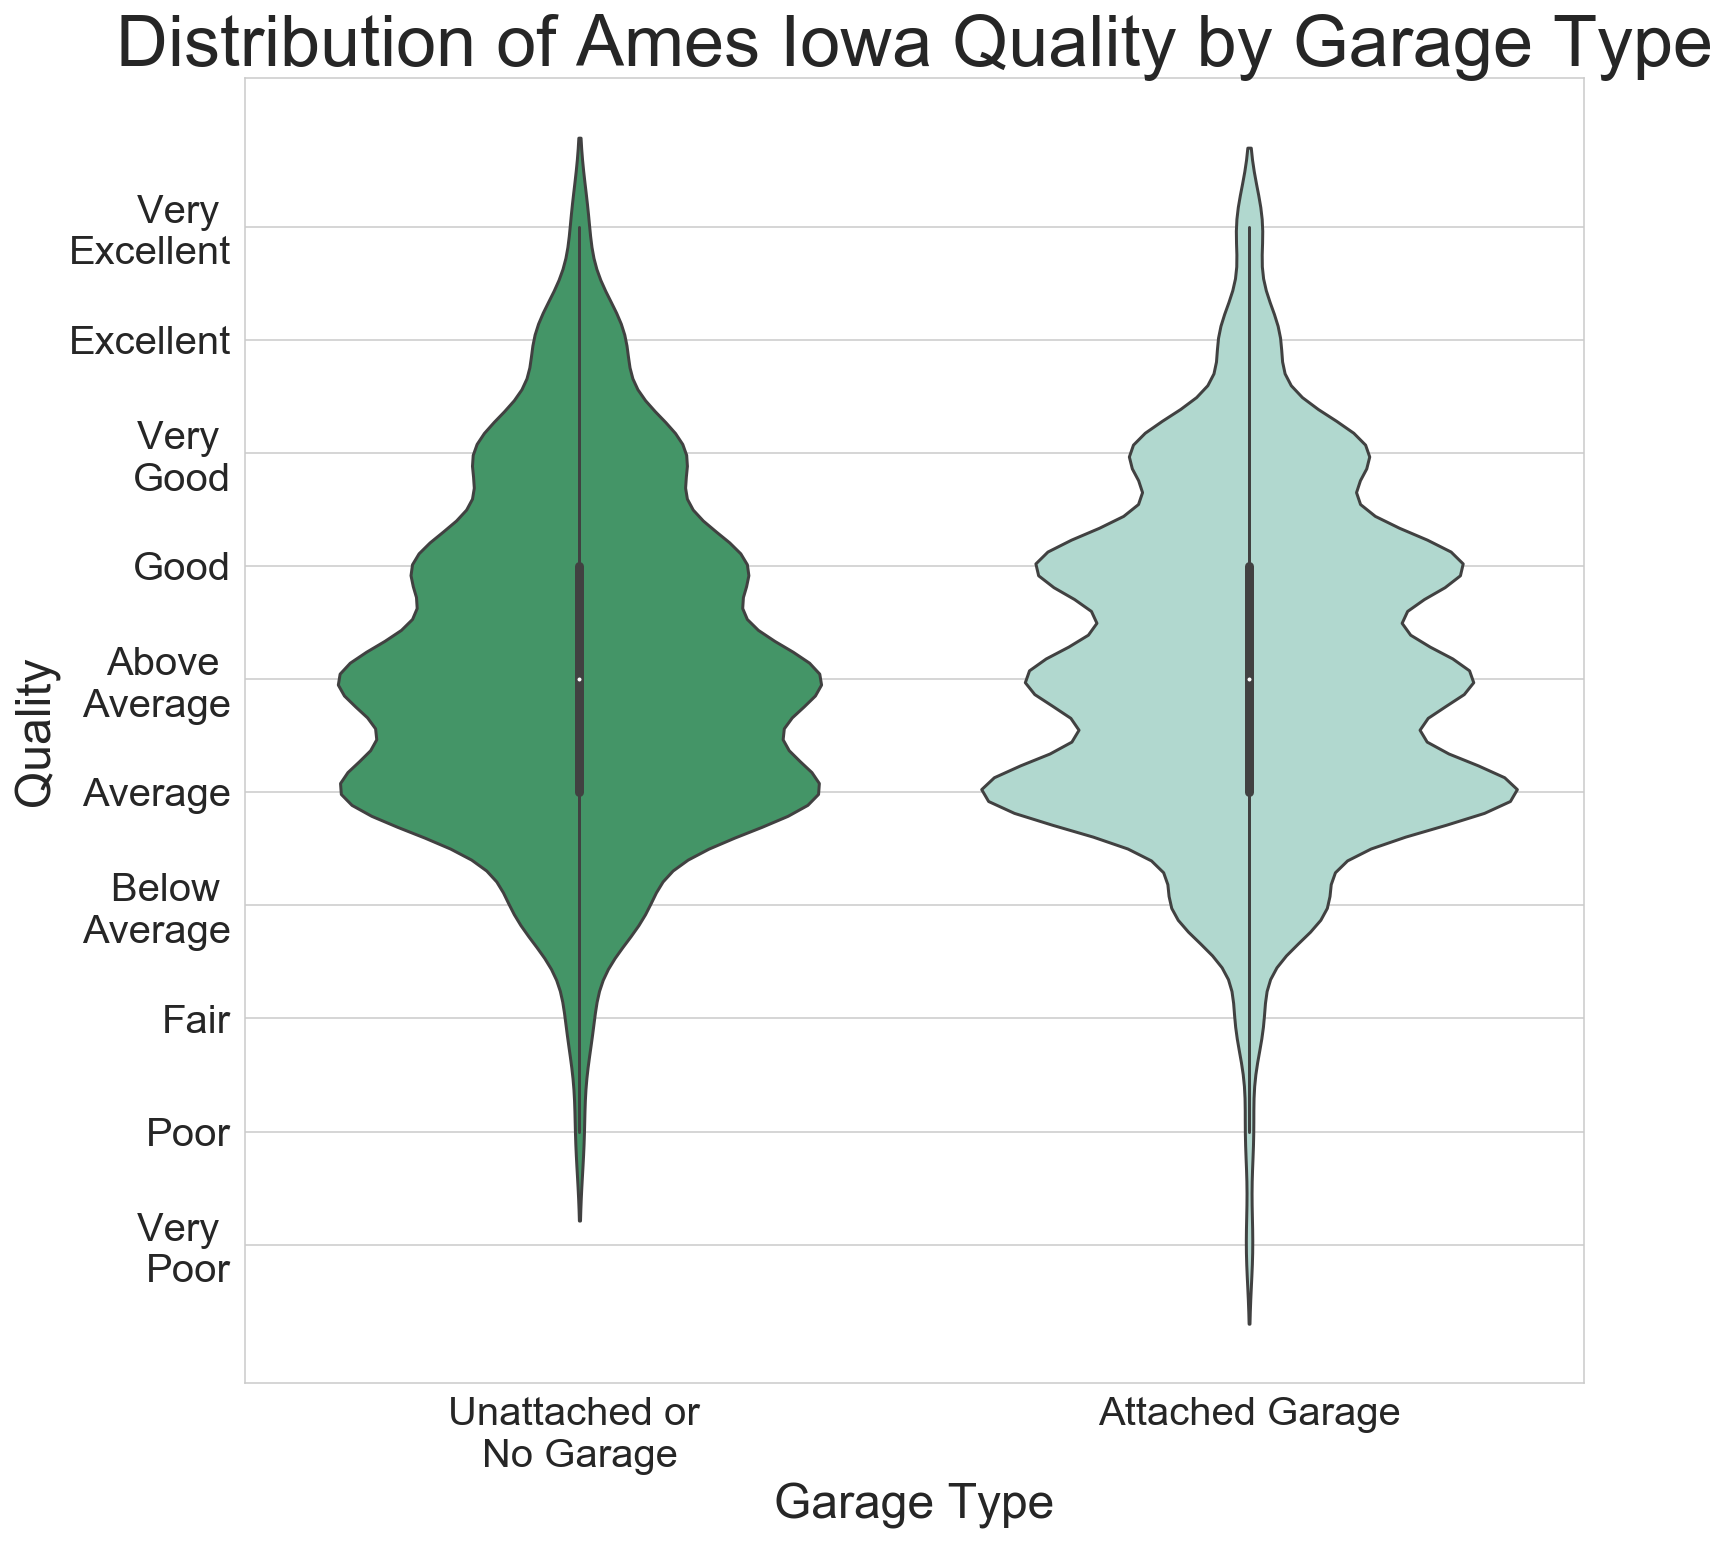

In [110]:
plt.figure(figsize=(12, 12)) #facecolor='gray')
plt.tick_params('both', labelsize=20)
plt.title('Distribution of Ames Iowa Quality by Garage Type', fontsize=36)
sns.violinplot(x=train.attached_garage, y=original.overall_qual, palette='BuGn_r')
plt.xticks(np.arange(2), ['Unattached or \nNo Garage', 'Attached Garage'])
plt.ylabel('Quality', fontsize=24)
plt.xlabel('Garage Type', fontsize=24)
plt.yticks(np.arange(1,11), ['Very \nPoor', 'Poor', 'Fair', 'Below \nAverage', 'Average', 
                           'Above \nAverage','Good', 'Very \nGood', 'Excellent', 'Very \nExcellent'])

;

Text(0.5, 0, 'Garage Type')

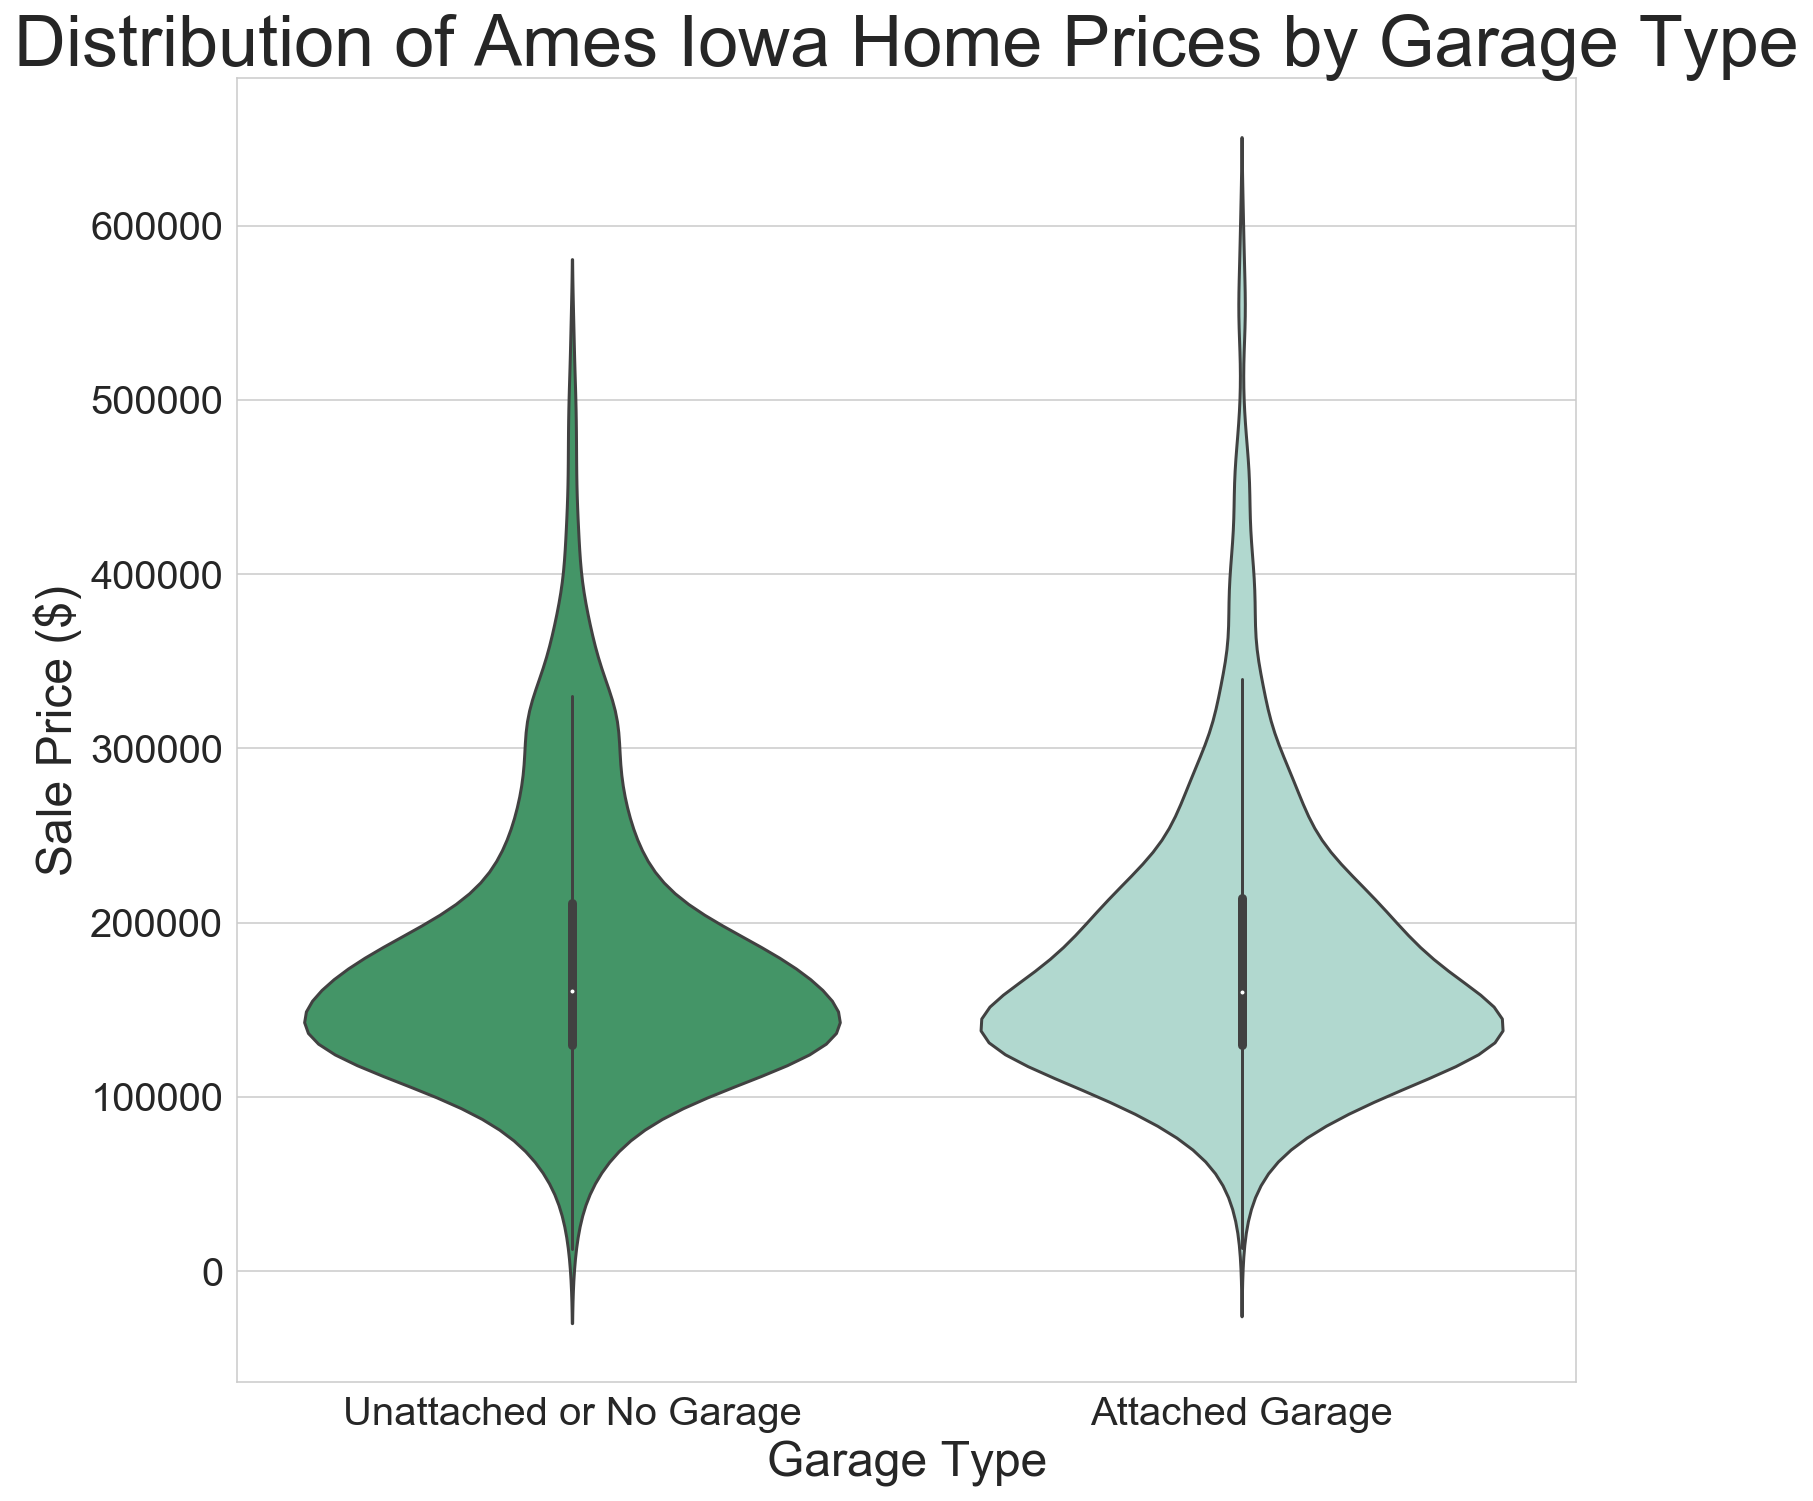

In [112]:
plt.figure(figsize=(12, 12))  #facecolor='gray')
plt.tick_params('both', labelsize=20)
plt.title('Distribution of Ames Iowa Home Prices by Garage Type', fontsize=36)
sns.violinplot(x=train.attached_garage, y=original.saleprice, palette='BuGn_r')
plt.xticks(np.arange(2), ['Unattached or No Garage', 'Attached Garage'])
plt.ylabel('Sale Price ($)', fontsize=24)
plt.xlabel('Garage Type', fontsize=24)

### Paved Driveway Results

In [88]:
X6 = train.drop('saleprice', axis=1)
y6 = train['saleprice']

In [89]:
corr2 = train.drop('saleprice', axis=1).corr()['overall_qual'].sort_values(ascending=False)
corr2 =pd.DataFrame(corr2)
corr2

,overall_qual
overall_qual,1.000000
kitchen_qual,0.692651
year_built,0.598060
log_gr_liv_area,0.595091
sqrt_gr_liv_area,0.584505
gr_liv_area,0.566943
garage_area,0.563480
total_bsmt_sf,0.558073
full_bath,0.511472
attached_garage,0.468674


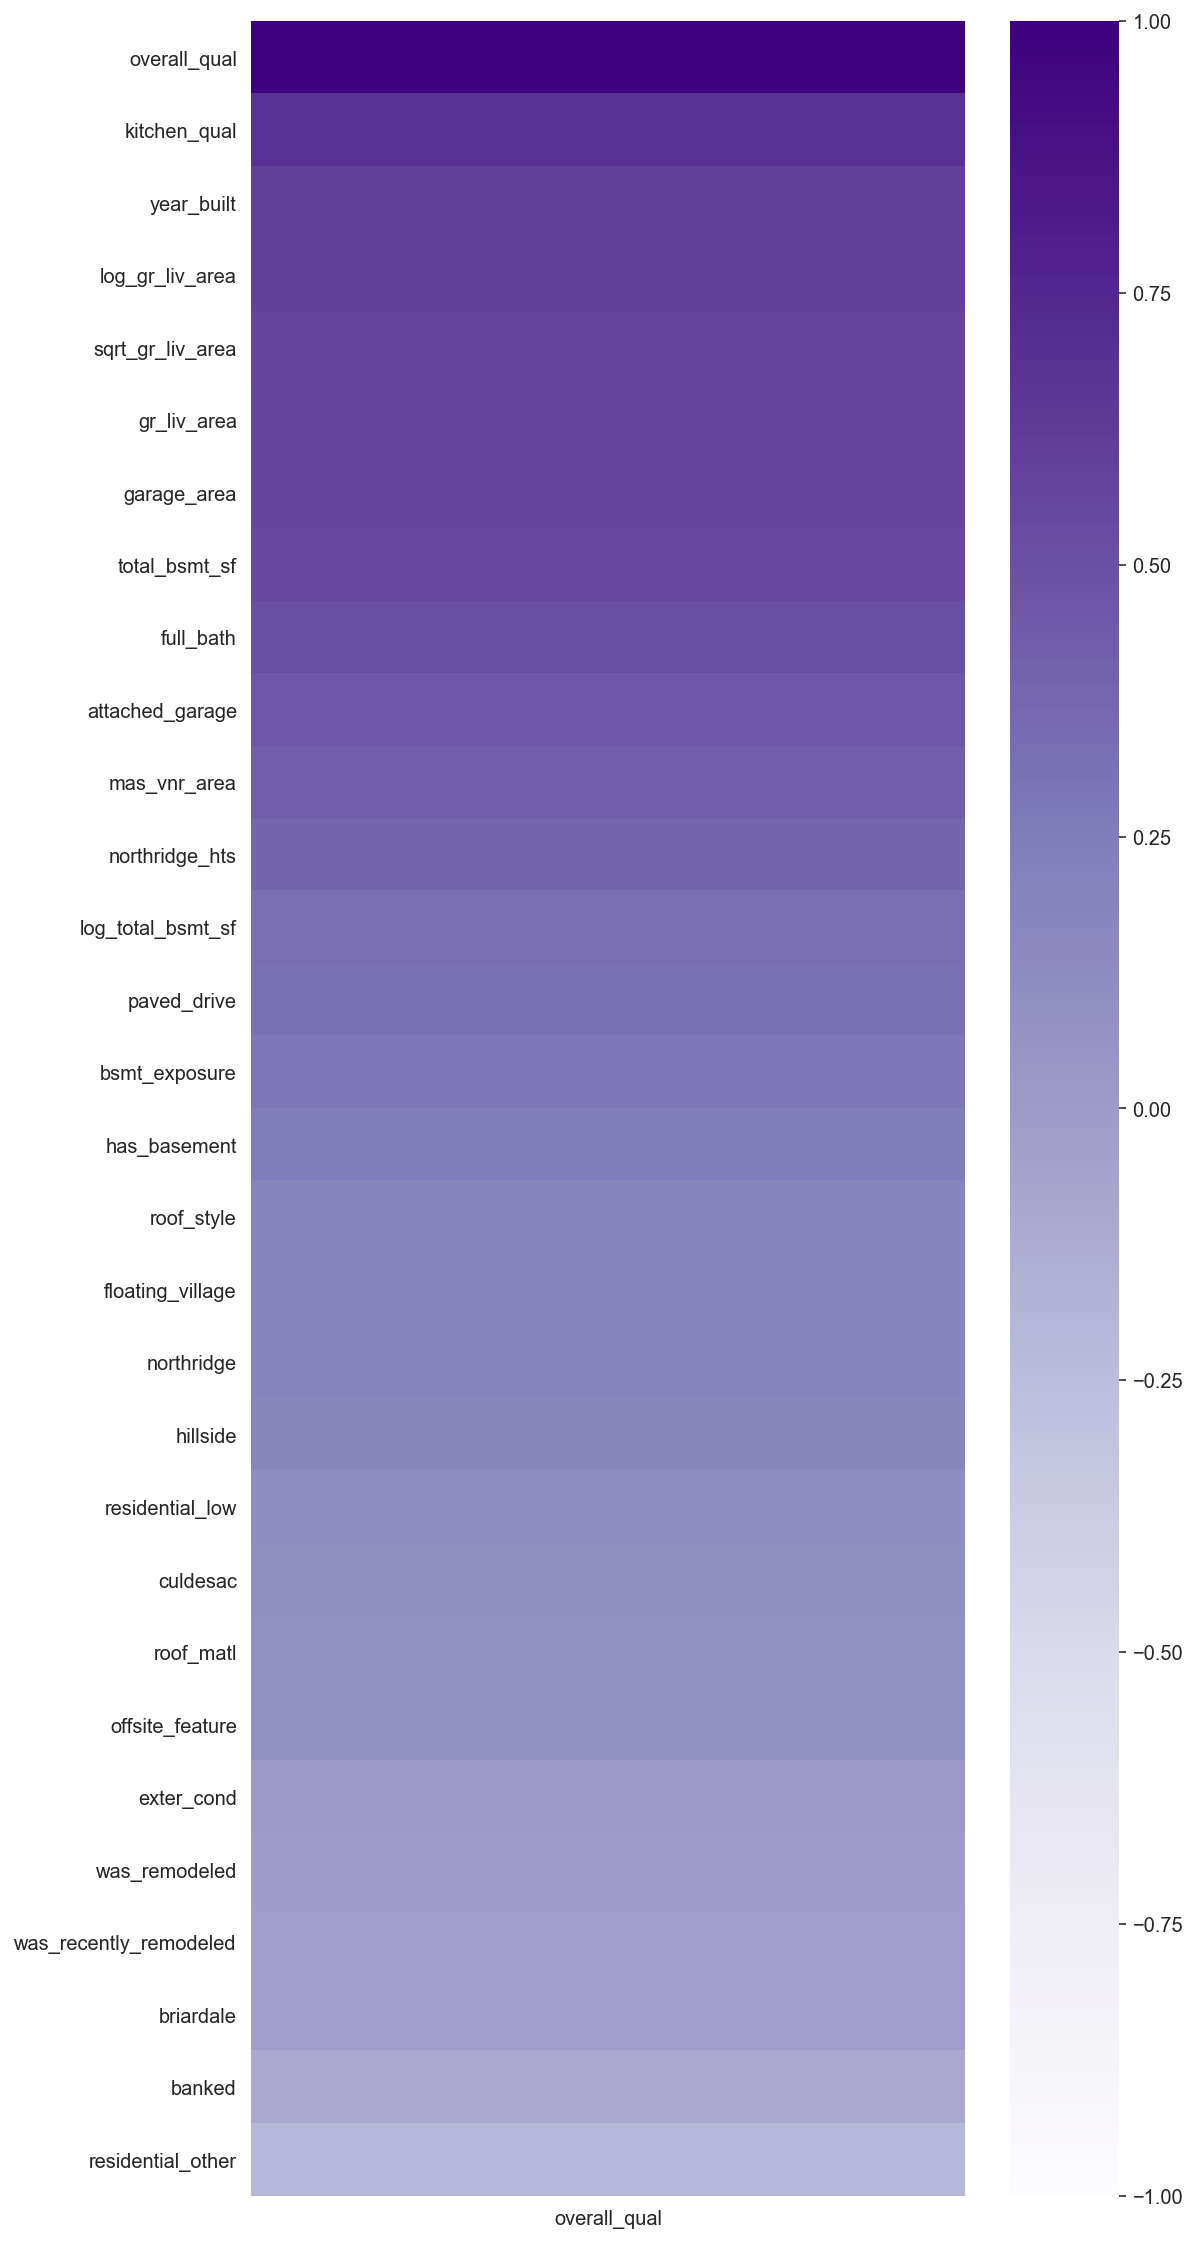

In [96]:
plt.figure(figsize=(8, 20))
sns.heatmap(corr2, cmap='Purples', vmin=-1);

''

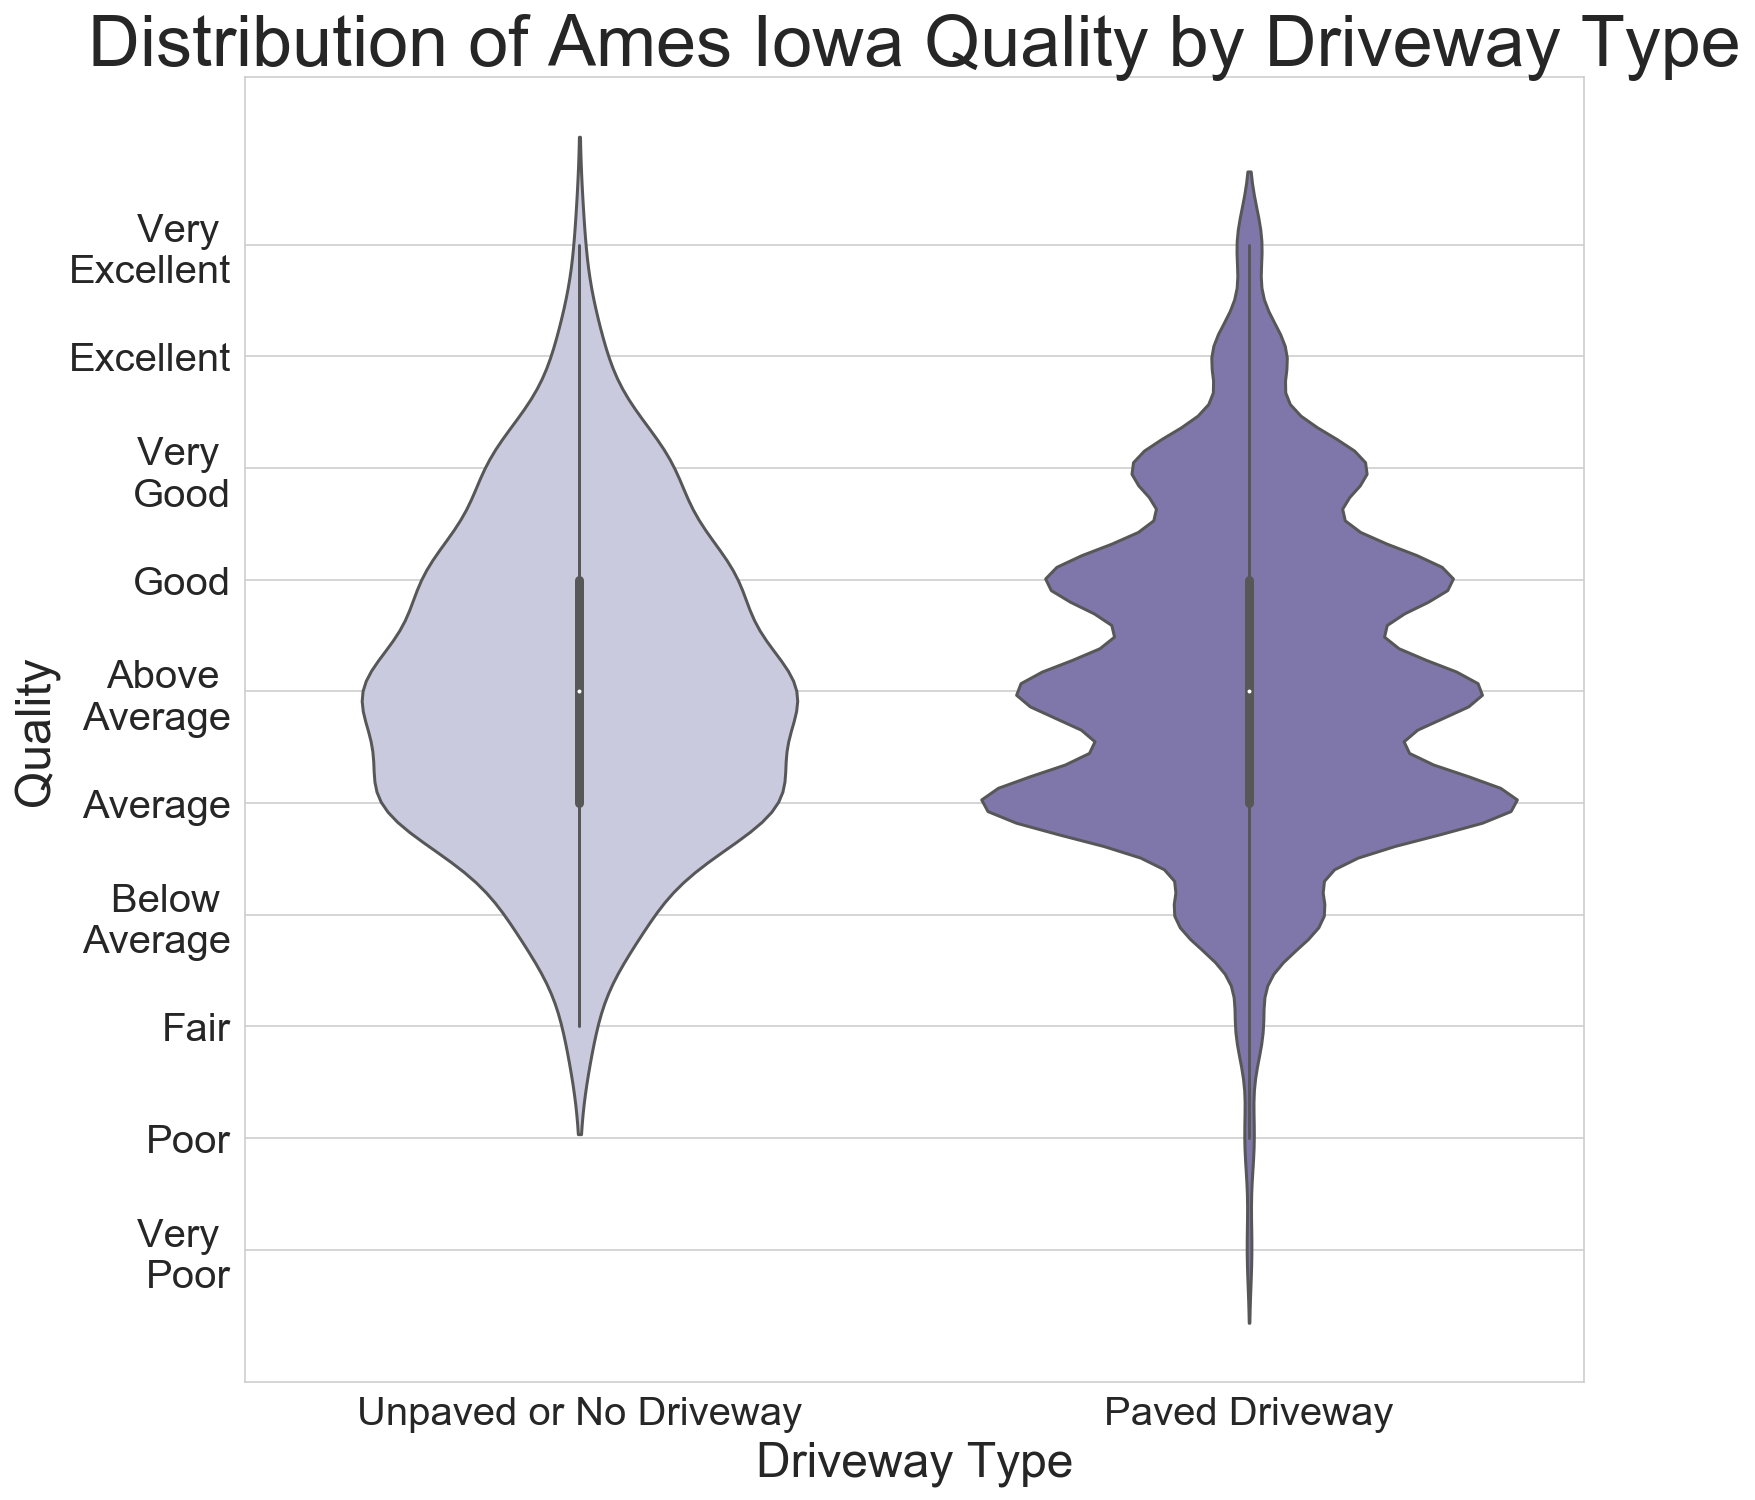

In [117]:
plt.figure(figsize=(12, 12)) #facecolor='gray')
plt.tick_params('both', labelsize=20)
plt.title('Distribution of Ames Iowa Quality by Driveway Type', fontsize=36)
sns.violinplot(x=train.paved_drive, y=original.overall_qual, palette='Purples')
plt.xticks(np.arange(2), ['Unpaved or No Driveway', 'Paved Driveway'])
plt.ylabel('Quality', fontsize=24)
plt.xlabel('Driveway Type', fontsize=24)
plt.yticks(np.arange(1,11), ['Very \nPoor', 'Poor', 'Fair', 'Below \nAverage', 'Average', 
                           'Above \nAverage','Good', 'Very \nGood', 'Excellent', 'Very \nExcellent'])

;

Text(0.5, 0, 'Driveway Type')

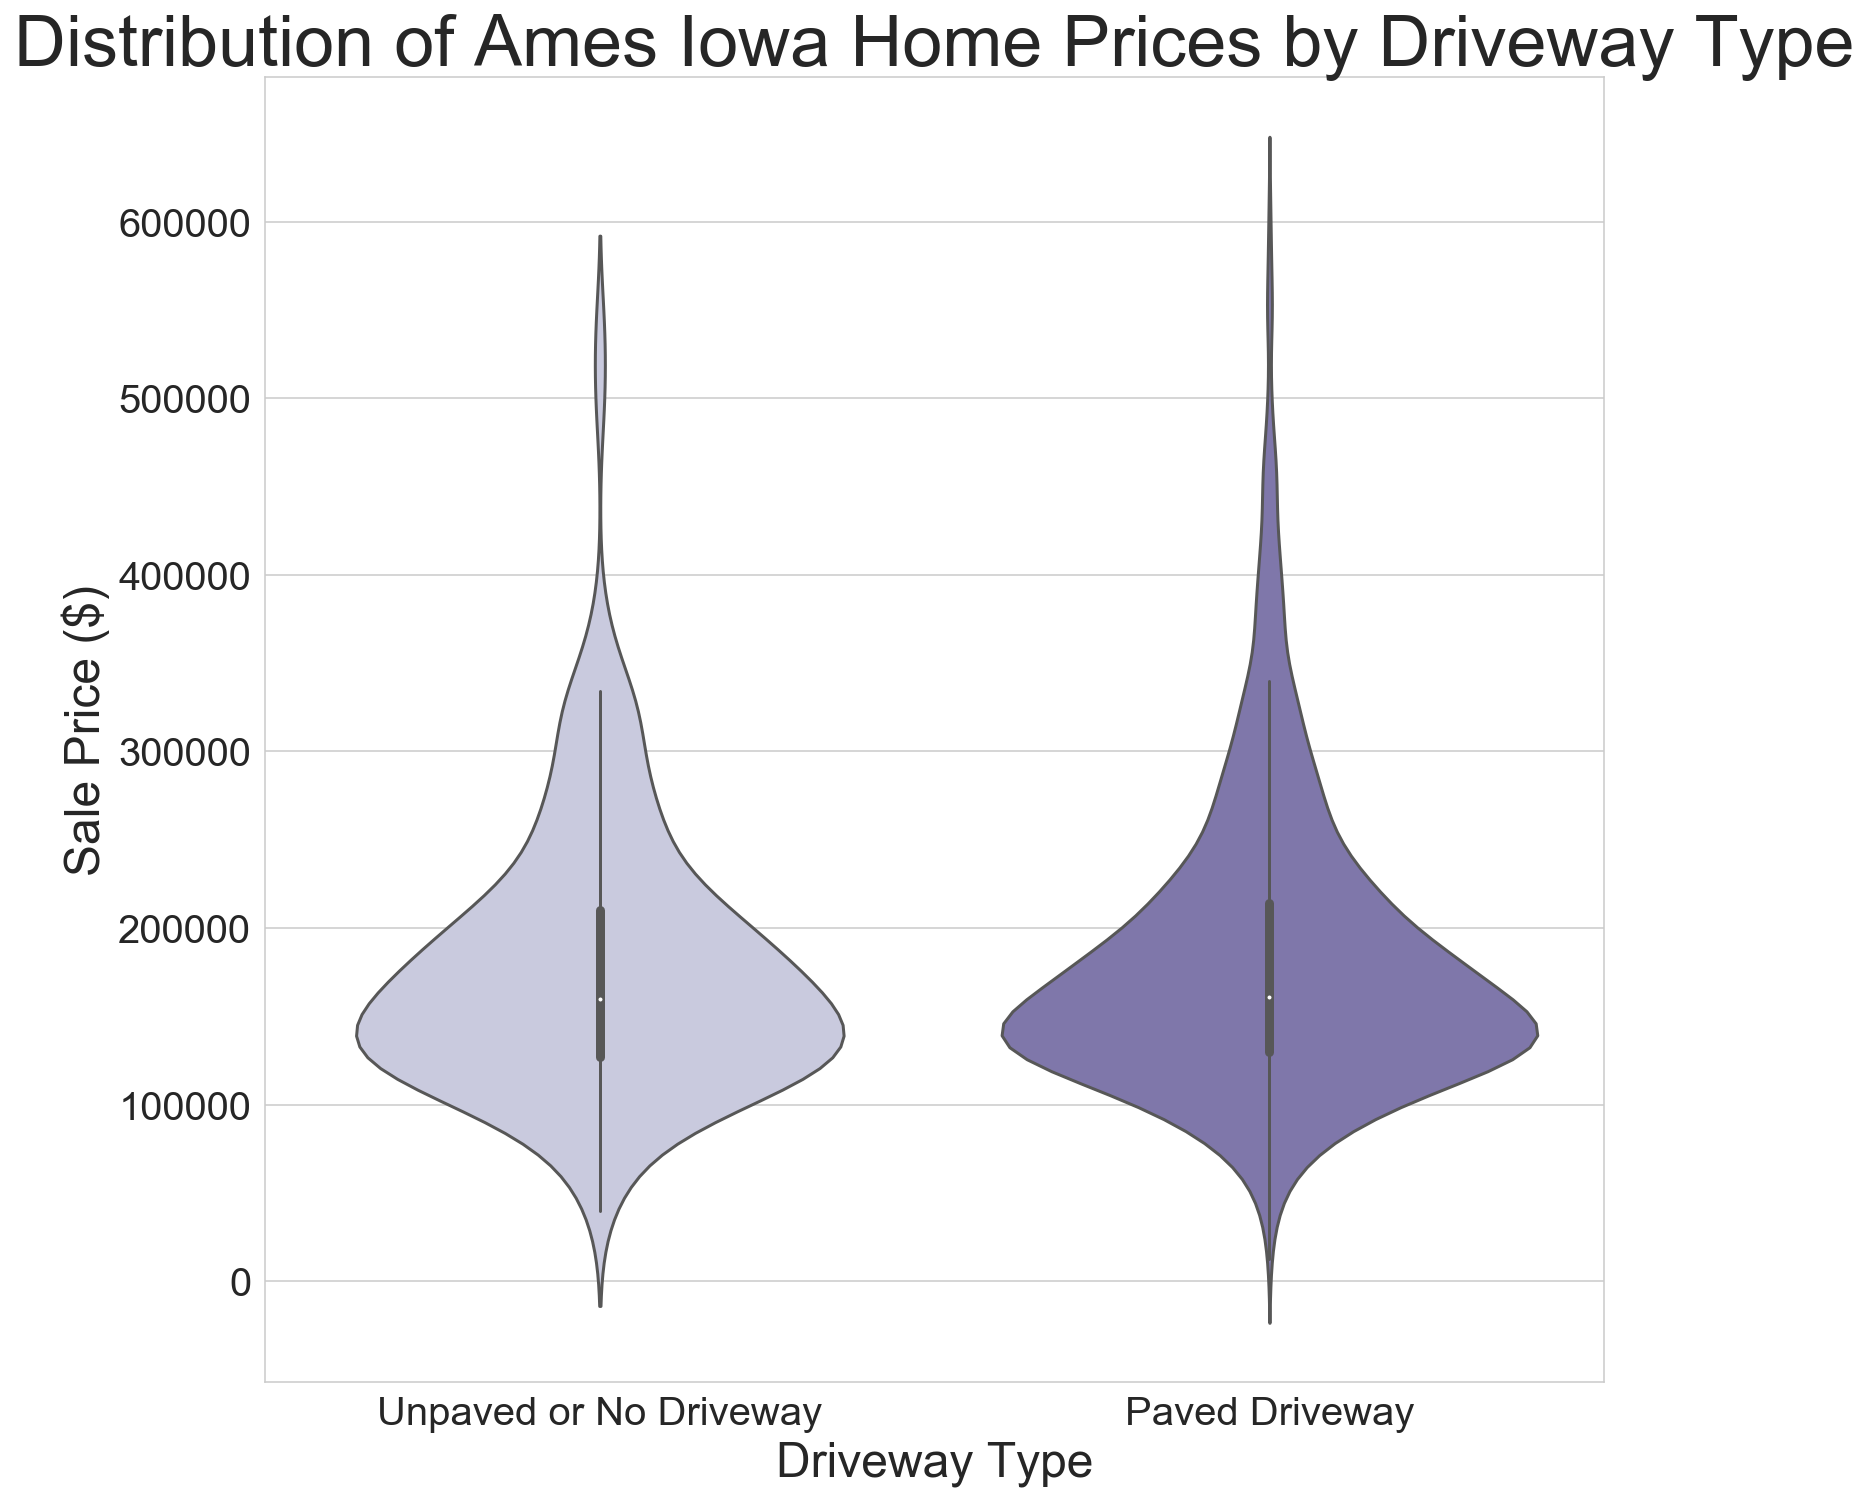

In [118]:
plt.figure(figsize=(12, 12)) #facecolor='gray')
plt.tick_params('both', labelsize=20)
plt.title('Distribution of Ames Iowa Home Prices by Driveway Type', fontsize=36)
sns.violinplot(x=train.paved_drive, y=original.saleprice, palette='Purples')
plt.xticks(np.arange(2), ['Unpaved or No Driveway', 'Paved Driveway'])
plt.ylabel('Sale Price ($)', fontsize=24)
plt.xlabel('Driveway Type', fontsize=24)